In [89]:
import requests
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

- imported the data file

In [90]:
bikes = pd.read_csv(r"C:\Users\benea\Downloads\dynamic.csv")

print("number of rows and columns:", bikes.shape)

number of rows and columns: (168300, 5)


In [91]:
bikes.head(5)

,time,number,stands_available,bikes_available,status
0,2022-03-22 00:00:11,30,16,4,OPEN
1,2022-03-22 00:00:11,42,0,30,OPEN
2,2022-03-22 00:00:11,54,10,23,OPEN
3,2022-03-22 00:00:11,108,14,21,OPEN
4,2022-03-22 00:00:12,6,17,3,OPEN


In [92]:
weather = pd.read_csv(r"C:\Users\benea\Downloads\current_weather.csv")

print("number of rows and columns:", weather.shape)

number of rows and columns: (2054, 16)


- Analysed the data format.

In [93]:
weather.tail(5)

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,uvi,clouds,wind_speed,wind_gusts,wind_dir,rain,snow,description,icon
2049,2022-03-27 13:36:41,2022-03-27 06:10:53,2022-03-27 18:49:52,12.89,12.19,1031,75,0.00,20,3.60,0.0,40,0,0,few clouds,02d
2050,2022-03-27 13:41:42,2022-03-27 06:10:53,2022-03-27 18:49:52,12.89,12.19,1031,75,2.36,20,3.60,0.0,40,0,0,few clouds,02d
2051,2022-03-27 13:46:43,2022-03-27 06:10:53,2022-03-27 18:49:52,12.75,12.04,1031,75,2.36,20,4.12,0.0,60,0,0,few clouds,02d
2052,2022-03-27 13:51:43,2022-03-27 06:10:53,2022-03-27 18:49:52,12.75,12.04,1030,75,0.00,20,4.12,0.0,60,0,0,few clouds,02d
2053,2022-03-27 13:56:44,2022-03-27 06:10:53,2022-03-27 18:49:52,12.72,12.01,1030,75,0.00,20,4.12,0.0,60,0,0,few clouds,02d


- Checked for null values.

In [94]:
weather.isnull().sum()

dt             0
sunrise        0
sunset         0
temp           0
feels_like     0
pressure       0
humidity       0
uvi            0
clouds         0
wind_speed     0
wind_gusts     0
wind_dir       0
rain           0
snow           0
description    0
icon           0
dtype: int64

In [95]:
bikes.isnull().sum()

time                0
number              0
stands_available    0
bikes_available     0
status              0
dtype: int64

- Checked for duplicates

In [96]:
weather[weather.duplicated()]

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,uvi,clouds,wind_speed,wind_gusts,wind_dir,rain,snow,description,icon


In [97]:
weather[weather.duplicated(['dt'])].count()

dt             0
sunrise        0
sunset         0
temp           0
feels_like     0
pressure       0
humidity       0
uvi            0
clouds         0
wind_speed     0
wind_gusts     0
wind_dir       0
rain           0
snow           0
description    0
icon           0
dtype: int64

In [98]:
bikes[bikes.duplicated()].count()

time                0
number              0
stands_available    0
bikes_available     0
status              0
dtype: int64

- Altered data types to prepare for modelling

In [99]:
bikes.dtypes

time                object
number               int64
stands_available     int64
bikes_available      int64
status              object
dtype: object

In [100]:
bikes['time'] = pd.to_datetime(bikes['time'])
bikes['status'] = bikes['status'].astype('category')

bikes.dtypes

time                datetime64[ns]
number                       int64
stands_available             int64
bikes_available              int64
status                    category
dtype: object

In [101]:
weather.dtypes

dt              object
sunrise         object
sunset          object
temp           float64
feels_like     float64
pressure         int64
humidity         int64
uvi            float64
clouds           int64
wind_speed     float64
wind_gusts     float64
wind_dir         int64
rain             int64
snow             int64
description     object
icon            object
dtype: object

In [102]:
weather['dt'] = pd.to_datetime(weather['dt'])
weather['description'] = weather['description'].astype('category')
weather['icon'] = weather['icon'].astype('category')
weather['rain'] = weather['rain'].astype('category')


weather.dtypes
#didn't bother changing the irrelelvant columns

dt             datetime64[ns]
sunrise                object
sunset                 object
temp                  float64
feels_like            float64
pressure                int64
humidity                int64
uvi                   float64
clouds                  int64
wind_speed            float64
wind_gusts            float64
wind_dir                int64
rain                 category
snow                    int64
description          category
icon                 category
dtype: object

- Merged the two data frames on the time value

In [103]:
#must merge the 2 data frames at the datetime columns
#times wont be exactly the same so must round them
#date time format is the same in each
#rounding all to neares 5 minutes so join is easier

bikes["time"] = bikes["time"].dt.round("5min")

weather["dt"] = weather["dt"].dt.round("5min")

weather.rename(columns = {'dt':'time'}, inplace = True)


weather.head(5)

,time,sunrise,sunset,temp,feels_like,pressure,humidity,uvi,clouds,wind_speed,wind_gusts,wind_dir,rain,snow,description,icon
0,2022-03-15 23:25:00,2022-03-15 06:40:05,2022-03-15 18:28:05,9.03,6.32,1015,80,0.0,75,5.14,0.0,210,0,0,broken clouds,04n
1,2022-03-15 23:25:00,2022-03-15 06:40:05,2022-03-15 18:28:05,9.03,6.32,1015,80,0.0,75,5.14,0.0,210,0,0,broken clouds,04n
2,2022-03-15 23:30:00,2022-03-15 06:40:05,2022-03-15 18:28:05,9.09,6.40,1015,80,0.0,75,5.14,0.0,210,0,0,broken clouds,04n
3,2022-03-15 23:35:00,2022-03-15 06:40:05,2022-03-15 18:28:05,9.19,6.52,1015,80,0.0,75,5.14,0.0,210,0,0,broken clouds,04n
4,2022-03-15 23:40:00,2022-03-15 06:40:05,2022-03-15 18:28:05,9.19,6.52,1015,80,0.0,75,5.14,0.0,210,0,0,broken clouds,04n


In [104]:
df = pd.merge(bikes,weather,on="time")
df = df.sample(frac=1)
print(df.shape)
df.tail(5)

(167596, 20)


,time,number,stands_available,bikes_available,status,sunrise,sunset,temp,feels_like,pressure,humidity,uvi,clouds,wind_speed,wind_gusts,wind_dir,rain,snow,description,icon
25906,2022-03-22 20:40:00,29,14,15,OPEN,2022-03-22 06:23:04,2022-03-22 18:40:50,8.75,6.96,1026,87,0.00,20,3.09,0.0,110,0,0,few clouds,02n
98805,2022-03-25 06:55:00,36,40,0,OPEN,2022-03-25 06:15:45,2022-03-25 18:46:15,8.45,8.45,1031,89,0.00,75,0.51,0.0,0,0,0,broken clouds,04d
84994,2022-03-24 20:00:00,31,3,17,OPEN,2022-03-24 06:18:11,2022-03-24 18:44:27,9.67,9.23,1030,79,0.00,20,1.54,0.0,10,0,0,few clouds,02n
165489,2022-03-27 12:15:00,44,23,7,OPEN,2022-03-27 06:10:53,2022-03-27 18:49:52,12.55,11.85,1031,76,2.85,20,4.02,0.0,70,0,0,few clouds,02d
151234,2022-03-27 00:55:00,67,0,40,OPEN,2022-03-27 06:10:53,2022-03-27 18:49:52,6.94,5.14,1034,83,0.00,20,2.57,0.0,90,0,0,few clouds,02n


In [105]:
df.count() / bikes.count()

bikes_available     0.995817
clouds                   NaN
description              NaN
feels_like               NaN
humidity                 NaN
icon                     NaN
number              0.995817
pressure                 NaN
rain                     NaN
snow                     NaN
stands_available    0.995817
status              0.995817
sunrise                  NaN
sunset                   NaN
temp                     NaN
time                0.995817
uvi                      NaN
wind_dir                 NaN
wind_gusts               NaN
wind_speed               NaN
dtype: float64

In [106]:
df.head(3)

,time,number,stands_available,bikes_available,status,sunrise,sunset,temp,feels_like,pressure,humidity,uvi,clouds,wind_speed,wind_gusts,wind_dir,rain,snow,description,icon
61686,2022-03-24 01:15:00,11,22,8,OPEN,2022-03-24 06:18:11,2022-03-24 18:44:27,9.86,8.98,1029,79,0.00,0,2.06,0.0,290,0,0,clear sky,01n
92884,2022-03-25 02:15:00,24,9,11,OPEN,2022-03-25 06:15:45,2022-03-25 18:46:15,7.94,6.74,1031,86,0.00,40,2.06,0.0,310,0,0,scattered clouds,03n
76939,2022-03-24 13:30:00,109,22,7,OPEN,2022-03-24 06:18:11,2022-03-24 18:44:27,15.71,14.88,1029,59,3.33,0,3.60,0.0,220,0,0,clear sky,01d


- Split the time and date into two seperate columns.
- converted them to integer formats to be analysed in the model

In [107]:
import datetime as dt

df['day'] = df.time.dt.day_name()
df['day'] = pd.factorize(df['day'], sort=True)[0]
df.tail

df['time'] = df.time.values.astype(np.int64) // 10 ** 10

In [108]:
df = df.drop(columns=["pressure", "sunset", "sunrise", "status", "description", "icon", "uvi", "wind_gusts", "snow", "feels_like", "wind_dir"])

In [109]:
df.head(20)

,time,number,stands_available,bikes_available,temp,humidity,clouds,wind_speed,rain,day
61686,164808450,11,22,8,9.86,79,0,2.06,0,3
92884,164817450,24,9,11,7.94,86,40,2.06,0,0
76939,164812860,109,22,7,15.71,59,0,3.60,0,3
64870,164809380,68,34,6,9.61,79,0,2.06,0,3
88532,164816190,72,3,28,9.35,85,75,1.03,0,3
136785,164830080,40,6,14,15.47,57,20,4.63,0,1
54099,164806290,90,38,2,12.38,68,75,2.06,0,5
60088,164807970,12,12,8,9.17,79,0,2.06,0,5
16600,164795460,40,9,12,15.60,65,20,6.17,0,4
134505,164829450,17,3,17,14.34,65,20,3.09,0,1


- Tested it with and without a few different columns and found it was most accurate with just time, as counterintuitive as that may seem.
- Chose to leave in the rain and day data as it may have been that the test set sample would not reflect the ability of the model to factor in these variables. The accuracy score was only fractionally reduced anyway.

- Split the data into input and output sets.
- Split those sets into training and testing sets.

In [110]:
#date time format is the same in each
from sklearn.model_selection import train_test_split

x = df.drop(columns=["bikes_available", "stands_available", "wind_speed", "humidity", "clouds", "temp"])
y = df.drop(columns=["wind_speed", "humidity", "clouds", "rain", "temp", "time", "day"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y.tail(2)

,number,stands_available,bikes_available
165489,44,23,7
151234,67,0,40


In [111]:
x.tail(5)

,time,number,rain,day
25906,164798160,29,0,4
98805,164819130,36,0,0
84994,164815200,31,0,3
165489,164838330,44,0,2
151234,164834250,67,0,2


In [112]:
y_test.tail(3)

,number,stands_available,bikes_available
29528,64,25,15
45967,9,3,20
21983,63,26,9


- Created an array to hold the station numbers.

In [113]:
x.number.nunique()


110

In [114]:
stations = x.number.unique()
stations = sorted(stations)
print(stations)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]


We initially experimented with a Linear Regression model but decided it was unsuitable for predicting as it didn't return a rounded integer value and additionally was more difficult to evaluate than a Decision Tree model.

In [115]:
model = LinearRegression()

y_train_b = y_train['bikes_available'] 
y_test_b = y_test['bikes_available']


model.fit(x_train, y_train_b)

predictions = model.predict(x_test)

print(predictions[70])

12.04632609675507


# IMPORTANT BIT

- Used Decision Tree model to predict the bikes and stands available.
- The loop allowed an easy saving of the pickle files and printed out the accuracy score for each station.
- To get a broad overview of the accuracy we created a demo model that would show the overall accuracy of the model. 


In [116]:
from sklearn.metrics import accuracy_score
import joblib
import pickle


model = DecisionTreeClassifier()

for i in stations:
    temp_x = x_train.loc[x_train['number'] == i] #assigning by the station number
    temp_y = y_train.loc[y_train['number'] == i]
    
    temp_test_x = x_test.loc[x_test['number'] == i]
    temp_test_y = y_test.loc[y_test['number'] == i]
    
    temp_y = temp_y['bikes_available'] #removing station number from output
    temp_test_y = temp_test_y['bikes_available'] #removing station number from output
    
    
    model.fit(temp_x, temp_y) 
    
    filename = f"bike_predict_station_{i}.pkl"
    pickle.dump(model,open(filename, 'wb'))
    
    
    predictions = model.predict(temp_test_x)
    score = accuracy_score(temp_test_y, predictions)
    print(f"accuracy score for station number {i}: {score}")

        
        



accuracy score for station number 2: 0.7947019867549668
accuracy score for station number 3: 0.6983606557377049
accuracy score for station number 4: 0.7788778877887789
accuracy score for station number 5: 0.6044303797468354
accuracy score for station number 6: 0.7635135135135135
accuracy score for station number 7: 0.8456973293768546
accuracy score for station number 8: 0.6765676567656765
accuracy score for station number 9: 0.5774193548387097
accuracy score for station number 10: 0.7266666666666667
accuracy score for station number 11: 0.8122866894197952
accuracy score for station number 12: 0.7864768683274022
accuracy score for station number 13: 0.8827361563517915
accuracy score for station number 15: 0.8717948717948718
accuracy score for station number 16: 0.8289473684210527
accuracy score for station number 17: 0.8312883435582822
accuracy score for station number 18: 0.6464968152866242
accuracy score for station number 19: 0.6064516129032258
accuracy score for station number 21: 0

In [117]:
# code for singular algorithm

y_train_b = y_train['bikes_available'] 
y_test_b = y_test['bikes_available']


model.fit(x_train, y_train_b)

predictions = model.predict(x_test)

score = accuracy_score(y_test_b, predictions)
score

0.7702863961813843

In [118]:
x_test.tail(3)

,time,number,rain,day
29528,164799180,64,0,4
45967,164803950,9,0,5
21983,164797050,63,0,4


In [119]:
y_test.tail(3)

,number,stands_available,bikes_available
29528,64,25,15
45967,9,3,20
21983,63,26,9


In [120]:

model2 = DecisionTreeClassifier()

for i in stations:
    temp_x = x_train.loc[x_train['number'] == i] #assigning by the station number
    temp_y = y_train.loc[y_train['number'] == i]
    
    temp_test_x = x_test.loc[x_test['number'] == i]
    temp_test_y = y_test.loc[y_test['number'] == i]
    
    temp_y = temp_y['stands_available'] #removing station number from output
    temp_test_y = temp_test_y['stands_available'] #removing station number from output
    
    
    model2.fit(temp_x, temp_y) 
    
    filename = f"space_predict_station_{i}.pkl"
    pickle.dump(model2,open(filename, 'wb'))
    
    
    predictions = model2.predict(temp_test_x)
    score = accuracy_score(temp_test_y, predictions)
    print(f"accuracy score for station number {i}: {score}")


accuracy score for station number 2: 0.7947019867549668
accuracy score for station number 3: 0.6950819672131148
accuracy score for station number 4: 0.7854785478547854
accuracy score for station number 5: 0.6044303797468354
accuracy score for station number 6: 0.7668918918918919
accuracy score for station number 7: 0.8456973293768546
accuracy score for station number 8: 0.6732673267326733
accuracy score for station number 9: 0.5741935483870968
accuracy score for station number 10: 0.7266666666666667
accuracy score for station number 11: 0.8122866894197952
accuracy score for station number 12: 0.7864768683274022
accuracy score for station number 13: 0.8827361563517915
accuracy score for station number 15: 0.8717948717948718
accuracy score for station number 16: 0.8289473684210527
accuracy score for station number 17: 0.8282208588957055
accuracy score for station number 18: 0.643312101910828
accuracy score for station number 19: 0.6064516129032258
accuracy score for station number 21: 0.

In [121]:
#old code for singular algorithm

y_train_s = y_train['stands_available'] 
y_test_s = y_test['stands_available']

print(x_test)

model2.fit(x_train, y_train_s)

predictions = model2.predict(x_test)

score = accuracy_score(y_test_s, predictions)
score

             time  number rain  day
75512   164812440      41    0    3
51282   164805450      96    0    5
139975  164831010       3    0    1
131647  164828640      84    0    1
105615  164821110      69    0    0
...           ...     ...  ...  ...
24770   164797830      69    0    4
28801   164799000      63    0    4
29528   164799180      64    0    4
45967   164803950       9    0    5
21983   164797050      63    0    4

[33520 rows x 4 columns]


0.7692124105011933

- Plot to display accuracy of the model through a graph. Dots on the blue line indicate that the guess was exactly correct.

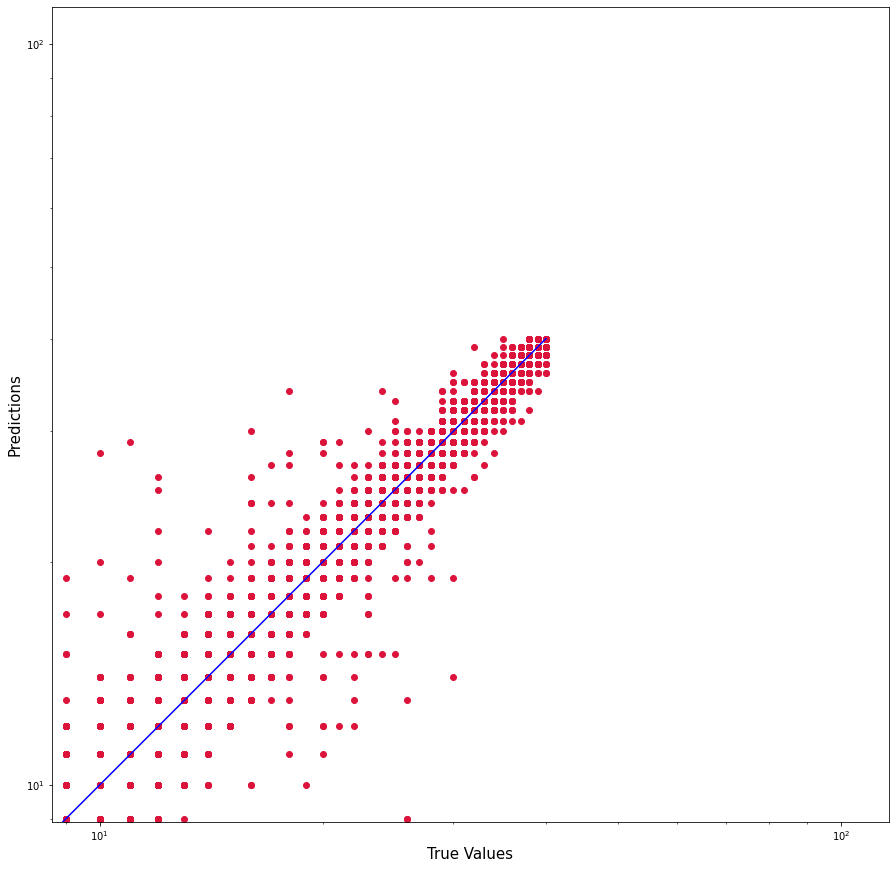

In [122]:
# source: https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value

plt.figure(figsize=(15,15))
plt.scatter(y_test_s, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y_test_s))
p2 = min(min(predictions), min(y_test_s))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()